# Part 1 - Installation and initial setup

## Loading packages

In [1]:
%%info

Let's install pandas and matplotlib

In [2]:
sc.install_pypi_package('pandas==1.0.5')
sc.install_pypi_package('matplotlib==3.2.1')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1701314028336_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Importing the installed packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

Loading all data from b3 bucket

In [4]:
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

Displaying the schema

In [5]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Displaying first 5 rows with 
* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [6]:
actors.select('primaryName', 'birthYear', 'deathYear', 'knownForTitles').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Genres

Displaying the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [7]:
genres.select('titleType', 'primaryTitle', 'genres').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

Displaying the unique categories:

In [8]:
genres.select('titleType').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Displaying the schema below:

In [9]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors

Displaying the schema below:

In [10]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [11]:
movie_actors.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

## Movie Ratings

Displaying the schema below:

In [12]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [13]:
movie_ratings.sort('numVotes', ascending = False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt8860450|          6.3|    9991|
|tt2032572|          5.2|    9991|
|tt0025173|          6.6|     999|
|tt0696544|          8.2|     999|
|tt0062155|          6.9|     999|
+---------+-------------+--------+
only showing top 10 rows

## Overview of Data

Displaying the number of rows and columns in each dataframe:

In [14]:
actors.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles']

In [15]:
print(
    "Number of columns in Actors table: ", len(actors.columns),
    "\nNumber of rows in Actors table: ", actors.count(),
    "\n\nNumber of columns in Genres table: ", len(genres.columns),
    "\nNumber of rows in Genres table: ", genres.count(),
    "\n\nNumber of columns in Movie Actors table: ", len(movie_actors.columns),
    "\nNumber of rows in Movie Actors table: ", movie_actors.count(),
    "\n\nNumber of columns in Movie Ratings table: ", len(movie_ratings.columns),
    "\nNumber of rows in Movie Ratings table: ", movie_ratings.count()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table:  6 
Number of rows in Actors table:  9706922 

Number of columns in Genres table:  9 
Number of rows in Genres table:  6321302 

Number of columns in Movie Actors table:  6 
Number of rows in Movie Actors table:  36468817 

Number of columns in Movie Ratings table:  3 
Number of rows in Movie Ratings table:  993153

# Part 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [16]:
genres.select('tconst', 'titleType', 'genres').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

In [17]:
from pyspark.sql.functions import explode, split
genres = genres.withColumn('genre', explode(split('genres', ',')))
genres.select('tconst', 'titleType', 'genre').show(10) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie category?**

In [18]:
from pyspark.sql.functions  import approx_count_distinct, countDistinct
genres.select(countDistinct('genre')).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [19]:
genres.select('genre').distinct().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

**there is a wierd "\N" in the genres list**

In [20]:
genres = genres.filter(genres.genre != "\\N")
genres.select('genre').distinct().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

In [21]:
genres.select(countDistinct('genre')).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

## Top genres by Movies

Finding the highest rates genres in the dataset.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First thing is joining two dataframes (movie ratings and genres) by tconst

In [22]:
average_rating_df = movie_ratings.join(genres.filter(genres.titleType == 'movie'), 'tconst').select('genre', 'averageRating')
average_rating_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [23]:
average_rating_df = average_rating_df.withColumn('averageRating', average_rating_df['averageRating'].cast('float'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
average_rating_df = average_rating_df.groupBy('genre').avg('averageRating')
average_rating_df.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|      genre|avg(averageRating)|
+-----------+------------------+
|    Mystery| 5.940437537126316|
|    Musical| 6.203246053185319|
|     Action| 5.718734067904495|
|      Sport| 6.600145190943391|
|    Romance| 6.125714179294426|
|   Thriller| 5.625967567519544|
|     Family| 6.250560452699635|
|    Fantasy| 5.924820762891499|
|    History| 6.822718117193864|
|  Animation| 6.326203749467441|
|  Film-Noir| 6.636246780503378|
|     Sci-Fi| 5.325150006900168|
|       News| 7.200916040944689|
|      Drama| 6.288080211097538|
|Documentary| 7.245469805371099|
|    Western| 5.948970991005059|
|     Comedy| 5.941363107822231|
|      Crime| 6.026013333109149|
|        War| 6.483807036278403|
|      Adult| 5.721742579082059|
+-----------+------------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [25]:
average_rating_df.sort('avg(averageRating)', ascending = False).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|      genre|avg(averageRating)|
+-----------+------------------+
|      Short| 7.259999942779541|
|Documentary| 7.245469805371099|
|       News| 7.200916040944689|
|  Biography| 6.983637643044585|
|  Game-Show| 6.974999904632568|
|    History| 6.822718117193864|
|      Music| 6.752020207214588|
|  Film-Noir| 6.636246780503378|
|      Sport| 6.600145190943391|
|        War| 6.483807036278403|
| Reality-TV| 6.379310377712907|
|  Animation| 6.326203749467441|
|      Drama| 6.288080211097538|
|     Family| 6.250560452699635|
|    Musical| 6.203246053185319|
|    Romance| 6.125714179294426|
|      Crime| 6.026013333109149|
|    Western| 5.948970991005059|
|     Comedy| 5.941363107822231|
|    Mystery| 5.940437537126316|
+-----------+------------------+
only showing top 20 rows

transform spark df into pandas df

In [26]:
pddf = average_rating_df.sort('avg(averageRating)', ascending = True).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

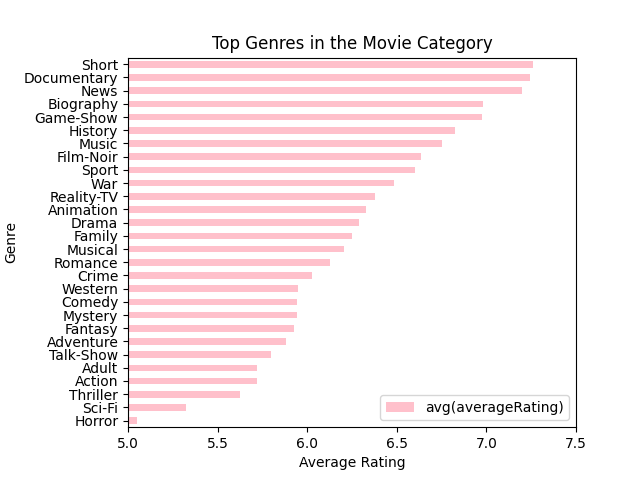

In [27]:
pddf.plot.barh('genre', 'avg(averageRating)', color = 'pink') # I like pink
plt.title('Top Genres in the Movie Category')
plt.xlim(5.0, 7.5)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.subplots_adjust(left = .2)
%matplot plt

# Part 3 - Analyzing Job Categories

## Total Unique Job Categories

What is the total number of unique job categories?

In [28]:
movie_actors.select('tconst', 'category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [29]:
movie_actors.select(countDistinct('category')).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [30]:
movie_actors.select('category').distinct().show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

Now let's find the top job categories in the dataset by rolling up categories.

### Count of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [31]:
movie_actors.groupBy('category').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

In [32]:
top_actors_jobs = movie_actors.groupBy('category').count().sort('count', ascending = False)
top_actors_jobs.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

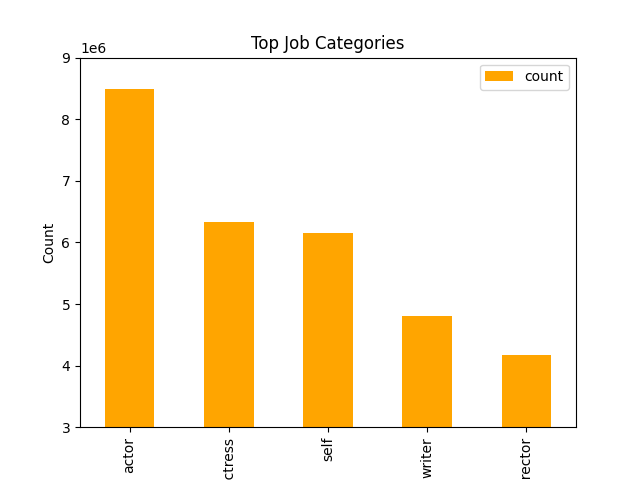

In [33]:
pd_actors = top_actors_jobs.limit(5).toPandas()
pd_actors.plot.bar('category', 'count', color = 'orange')
plt.title('Top Job Categories')
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.ylim(3000000,9000000)
%matplot plt

# Part 4 - Answer the following questions:

## Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

First join actors, genres, and movie actors on each other

In [34]:
q4df = genres.join(movie_actors, 'tconst').join(actors, 'nconst').filter(genres.titleType == 'movie').select('category', 'primaryName', 'startYear', 'primaryTitle')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
q4df.createOrReplaceTempView('movies')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
spark.sql("""
SELECT DISTINCT m1.primaryTitle
FROM movies m1, movies m2
WHERE m1.primaryTitle = m2.primaryTitle
AND m1.primaryName = 'Johnny Depp'
AND m2.primaryName = 'Helena Bonham Carter'
""").show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Corpse Bride                                  |
|Dark Shadows                                  |
|Charlie and the Chocolate Factory             |
|Alice Through the Looking Glass               |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice in Wonderland                           |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

In [41]:
q4df.filter(q4df.primaryName == 'Brad Pitt').filter(q4df.startYear > 2010).distinct().sort('startYear', ascending = False).select('primaryTitle', 'startYear').show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Irresistible                     |2020     |
|Kajillionaire                    |2020     |
|The King                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|Ad Astra                         |2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Allied                           |2016     |
|Voyage of Time: Life's Journey   |2016     |
|Hitting the Apex                 |2015     |
|The Big Short                    |2015     |
|By the Sea                       |2015     |
|Fury                             |2014     |
|World War Z                      |2013     |
|Kick-Ass 2                       |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|Moneyball                        

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [42]:
q4df.filter(q4df.category == 'actress').filter(q4df.primaryName == 'Zendaya').filter(q4df.startYear != '\\N').distinct().groupby('startYear').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2020|    1|
|     2018|    2|
|     2017|    1|
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [43]:
q4_4 = genres.join(movie_ratings, 'tconst').filter(genres.titleType == 'movie').filter(movie_ratings.averageRating > 9.7).filter(genres.startYear == 2019).select('primaryTitle', 'averageRating').distinct()
q4_4.withColumn('averageRating', q4_4.averageRating.cast('float')).sort('averageRating', ascending = False).show(truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|L'Enfant Terrible                                |10.0         |
|A Grunt's Life                                   |10.0         |
|Our Scripted Life                                |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|Love in Kilnerry                                 |10.0         |
|Kirket                                           |10.0         |
|The Cardinal                                     |9.9          |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|Square On